In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the monthly natural gas price data
data = pd.read_csv('Nat_Gas.csv')

# Convert the 'Dates' column to datetime format
data['Dates'] = pd.to_datetime(data['Dates'], format='%m/%d/%y')

# Set the 'Dates' column as the index
data.set_index('Dates', inplace=True)


## Finding the best values for the SARIMA model

In [21]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

pm.auto_arima(data['Prices'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4,
               trace=True,error_action='ignore', suppress_warnings=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=36.454, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=48.334, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=38.394, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.336, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46.741, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=39.688, Time=0.22 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=39.336, Time=0.44 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=38.769, Time=0.41 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=36.098, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=53.197, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=53.566, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=53.701, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=53.674, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.953,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -12.049
Date:                Tue, 07 May 2024   AIC                             36.098
Time:                        22:05:26   BIC                             47.199
Sample:                    10-31-2020   HQIC                            40.275
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0096      0.008      1.258      0.208      -0.005       0.025
ar.L1          1.6958      0.048     35.383      0.000       1.602       1.790
ar.L2         -0.9632      0.045    -21.466      0.000      -1.051      -0.875
ma.L1         -1.8043      0.284     -6.358      0.000      -2.360      -1.248
ma.L2          0.9516      0.315      3.021      0.003       0.334       1.569
sigma2         0.0881      0.030      2.967      0.003       0.030       0.146
===================================================================================
Ljung-Box (L1) (Q):                   6.65   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.01   Prob(JB):                         0.31
Heteroskedasticity (H):               0.87   Skew:                             0.50
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Creating a SARIMA model

C:\Users\rapha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\rapha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\rapha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rapha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rapha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

Root Mean Squared Error (RMSE): 0.31919500642505444
Mean Absolute Percentage Error (MAPE): 2.2320098766652374


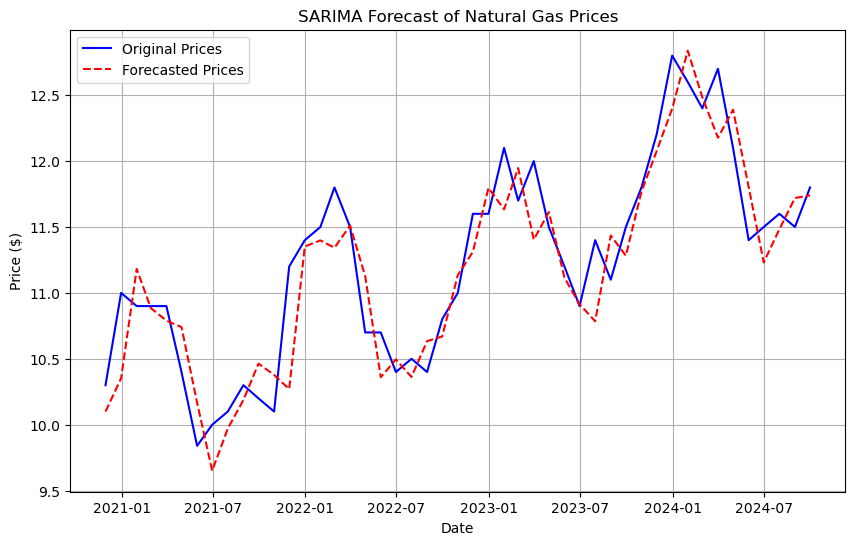

          Original Prices  Forecasted Prices
Dates                                       
31-10-20            10.10                NaN
30-11-20            10.30          10.100000
31-12-20            11.00          10.351930
31-01-21            10.90          11.182118
28-02-21            10.90          10.885066
31-03-21            10.90          10.789664
30-04-21            10.40          10.740508
31-05-21             9.84          10.167353
30-06-21            10.00           9.651112
31-07-21            10.10           9.970994
31-08-21            10.30          10.187349
30-09-21            10.20          10.463677
31-10-21            10.10          10.377717
30-11-21            11.20          10.270418
31-12-21            11.40          11.352243
31-01-22            11.50          11.398235
28-02-22            11.80          11.342697
31-03-22            11.50          11.510440
30-04-22            10.70          11.127262
31-05-22            10.70          10.360327
30-06-22  

In [16]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Function to calculate RMSE
def calculate_rmse(actual, forecast):
    return np.sqrt(np.mean((actual - forecast) ** 2))

# Function to calculate MAPE
def calculate_mape(actual, forecast):
    return 100 / len(actual) * np.sum(np.abs((actual - forecast) / actual))


# Fit a SARIMA model to the whole data
order = (2, 1, 2)  # Example order for SARIMA model
seasonal_order = (0, 0, 0, 12)  # Example seasonal order for SARIMA model
sarima_model = SARIMAX(data['Prices'], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Forecast prices for the whole dataset
forecast = sarima_results.predict(start=data.index[1], end=data.index[-1])

# Calculate RMSE
rmse = calculate_rmse(data['Prices'], forecast)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAPE
mape = calculate_mape(data['Prices'], forecast)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Plot the original data and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index[1:], data['Prices'][1:], label='Original Prices', color='blue')  # Start from the second point
plt.plot(data.index[1:], forecast, label='Forecasted Prices', linestyle='--', color='red')  # Start from the second point
plt.title('SARIMA Forecast of Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Create a new dataset with forecasted data
forecasted_data = pd.DataFrame(index=data.index)  # Use data.index directly as index
forecasted_data['Original Prices'] = data['Prices']
forecasted_data['Forecasted Prices'] = forecast
# Convert index to datetime
forecasted_data.index = pd.to_datetime(forecasted_data.index)

# Format index to DD-MM-YY
forecasted_data.index = forecasted_data.index.strftime('%d-%m-%y')

print(forecasted_data)



## Evaluating the model
### Changing the start date of the evaluation to give the model some time to learn the patterns of the dataset

Root Mean Squared Error (RMSE): 0.2999378263964641
Mean Absolute Percentage Error (MAPE): 2.102231846419831


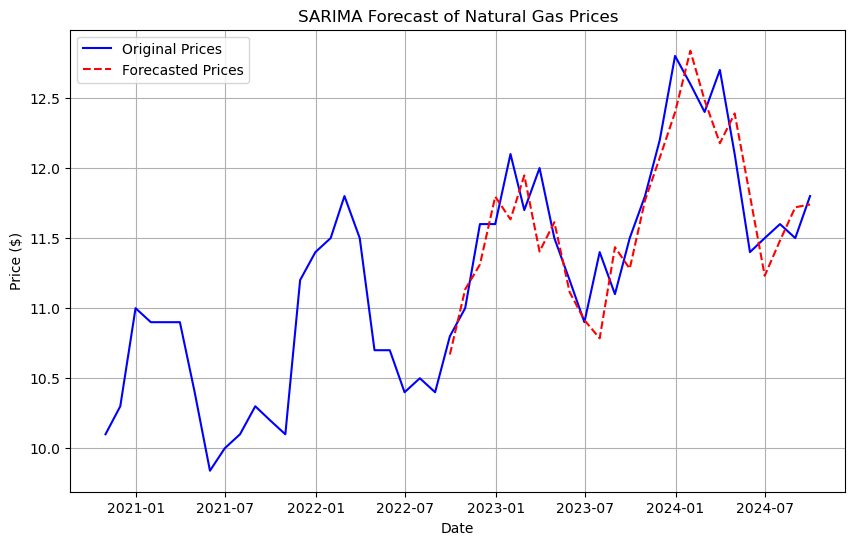

            Original Prices  Forecasted Prices
Dates                                         
2022-09-30             10.8          10.669327
2022-10-31             11.0          11.134196
2022-11-30             11.6          11.311568
2022-12-31             11.6          11.796096
2023-01-31             12.1          11.633724
2023-02-28             11.7          11.946934
2023-03-31             12.0          11.404090
2023-04-30             11.5          11.613436
2023-05-31             11.2          11.114943
2023-06-30             10.9          10.914585
2023-07-31             11.4          10.784771
2023-08-31             11.1          11.435190
2023-09-30             11.5          11.282068
2023-10-31             11.8          11.768321
2023-11-30             12.2          12.074248
2023-12-31             12.8          12.397695
2024-01-31             12.6          12.837155
2024-02-29             12.4          12.484232
2024-03-31             12.7          12.176905
2024-04-30   

In [17]:
# Start date as the 24th point in the dataset (mid point)
start_date = '30-09-22'  

# Forecast prices starting from the specified start date
forecast = sarima_results.predict(start=start_date, end=data.index[-1])

# Calculate RMSE
rmse = calculate_rmse(data['Prices'].loc[start_date:], forecast)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAPE
mape = calculate_mape(data['Prices'].loc[start_date:], forecast)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Plot the original data and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Prices'], label='Original Prices', color='blue')
plt.plot(data.index[data.index >= start_date], forecast, label='Forecasted Prices', linestyle='--', color='red')
plt.title('SARIMA Forecast of Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Create a new dataset with forecasted data
forecasted_data = pd.DataFrame(index=data.index[data.index >= start_date])
forecasted_data['Original Prices'] = data['Prices'][data.index >= start_date]
forecasted_data['Forecasted Prices'] = forecast

print(forecasted_data)


## Plotting the forecast

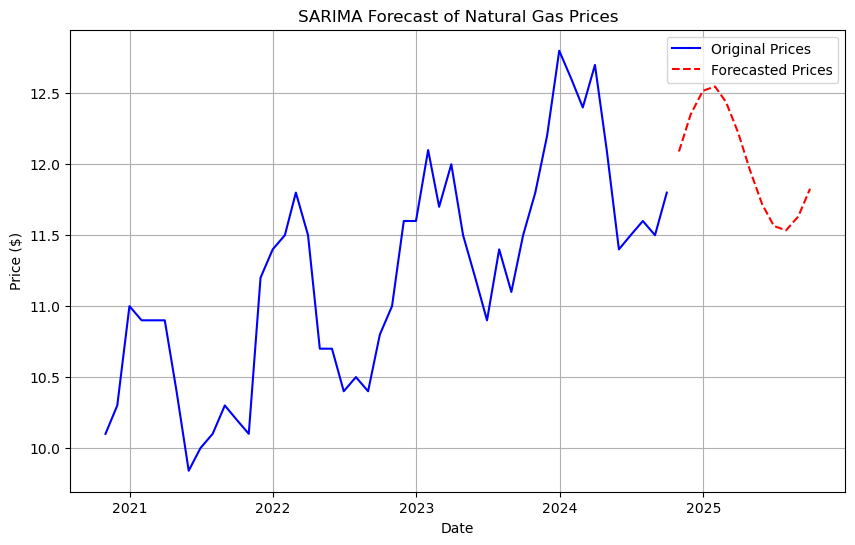

            Forecasted Prices
2024-10-31          12.089875
2024-11-30          12.351770
2024-12-31          12.517921
2025-01-31          12.547760
2025-02-28          12.437699
2025-03-31          12.220929
2025-04-30          11.957570
2025-05-31          11.718086
2025-06-30          11.564498
2025-07-31          11.534386
2025-08-31          11.631807
2025-09-30          11.827270


In [18]:
# Define the last date in the dataset
last_date = data.index[-1]

# Define the start date for forecasting
start_date = last_date + pd.DateOffset(months=1)

# Define the end date for forecasting (12 months past the last date in the dataset)
end_date = last_date + pd.DateOffset(months=12)

# Forecast prices starting from the specified start date
forecast = sarima_results.predict(start=start_date, end=end_date)

# Plot the original data and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Prices'], label='Original Prices', color='blue')
plt.plot(pd.date_range(start=start_date, end=end_date, freq='M'), forecast, label='Forecasted Prices', linestyle='--', color='red')
plt.title('SARIMA Forecast of Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Create a new dataset with forecasted data
forecasted_data = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq='M'))
forecasted_data['Forecasted Prices'] = forecast

print(forecasted_data)


## Plotting the forecast with plotly

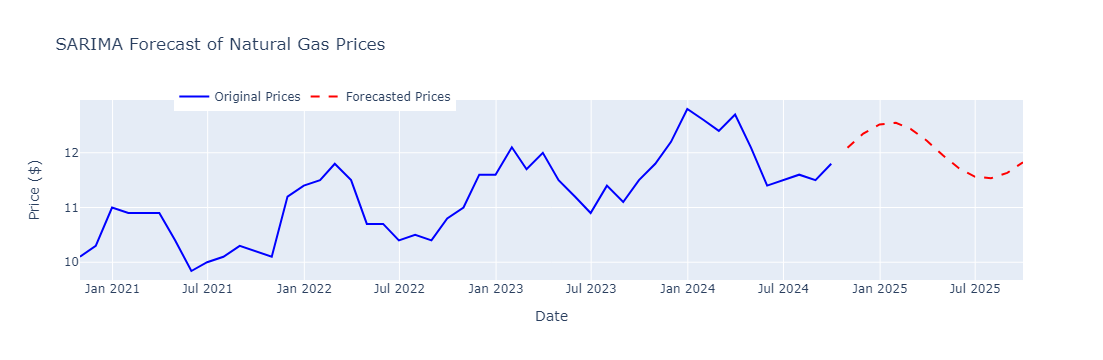

            Forecasted Prices
2024-10-31          12.089875
2024-11-30          12.351770
2024-12-31          12.517921
2025-01-31          12.547760
2025-02-28          12.437699
2025-03-31          12.220929
2025-04-30          11.957570
2025-05-31          11.718086
2025-06-30          11.564498
2025-07-31          11.534386
2025-08-31          11.631807
2025-09-30          11.827270


In [20]:
import plotly.graph_objects as go
# Define the last date in the dataset
last_date = data.index[-1]

# Define the start date for forecasting
start_date = last_date + pd.DateOffset(months=1)

# Define the end date for forecasting 
end_date = last_date + pd.DateOffset(months=13)

# Forecast prices starting from the specified start date
forecast = sarima_results.predict(start=start_date, end=end_date)

# Create traces
trace_original = go.Scatter(x=data.index, y=data['Prices'], mode='lines', name='Original Prices', line=dict(color='blue'))
trace_forecasted = go.Scatter(x=pd.date_range(start=start_date, end=end_date, freq='M'), y=forecast, mode='lines', name='Forecasted Prices', line=dict(color='red', dash='dash'))

# Create layout
layout = go.Layout(title='SARIMA Forecast of Natural Gas Prices',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price ($)'),
                   legend=dict(x=0.1, y=1.1, orientation='h'))

# Create figure
fig = go.Figure(data=[trace_original, trace_forecasted], layout=layout)

# Show plot
fig.show()

# Create a new dataset with forecasted data
forecasted_data = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq='M'))
forecasted_data['Forecasted Prices'] = forecast

print(forecasted_data)

In [11]:
def get_forecast_for_date(forecasted_data):
    # Ask the user for a date
    input_date = input("Enter a date in YYYY-MM-DD format: ")

    try:
        # Parse the input date to datetime format
        date = pd.to_datetime(input_date, format='%Y-%m-%d').normalize()

        # Check if the date exists in the forecasted_data
        if date in forecasted_data.index:
            # Get the forecasted price for the input date
            forecast_price = forecasted_data.loc[date, 'Forecasted Prices']
            # Format the date to remove the time component
            formatted_date = date.strftime('%Y-%m-%d')
            print(f"Forecasted price for {formatted_date}: {forecast_price}")
        else:
            print("Date not found in forecasted data.")
    except ValueError:
        print("Invalid date format. Please enter a date in YYYY-MM-DD format.")

# Example usage:
get_forecast_for_date(forecasted_data)


Enter a date in YYYY-MM-DD format:  2025-07-31


Forecasted price for 2025-07-31: 12.181147167432881
